In [29]:
# Install necessary packages
!pip install -q scikit-learn pandas tabulate seaborn wordcloud matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Ensure Pandas displays all rows and columns
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)  # No limit on column width
pd.set_option("display.max_colwidth", None)  # Show full content in each cell


In [2]:
# dataframe 
df = pd.read_csv("..//potential-talents - Aspiring human resources - seeking human resources.csv")

In [3]:
print(df.shape)

(104, 5)


In [4]:
# Look at head and tal of data

print(df.head(10).to_string(index=False))
print("\n-------------------------------------------\n")
print(df.tail(10).to_string(index=False))

 id                                                                                                job_title                            location connection  fit
  1 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                      Houston, Texas         85  NaN
  2                                                Native English Teacher at EPIK (English Program in Korea)                              Kanada      500+   NaN
  3                                                                    Aspiring Human Resources Professional Raleigh-Durham, North Carolina Area         44  NaN
  4                                                                   People Development Coordinator at Ryan                       Denton, Texas      500+   NaN
  5                                                          Advisory Board Member at Celal Bayar University                      İzmir, Türkiye      500+   NaN
  6                               

In [5]:
# get data types

print(df.dtypes)

id              int64
job_title      object
location       object
connection     object
fit           float64
dtype: object


In [6]:
import pandas as pd

# Create a summary DataFrame
eda_summary = pd.DataFrame({
    "Column": df.columns,
    "Data Type": df.dtypes.values,
    "Unique Count": [df[col].nunique() for col in df.columns],
    "Missing Values": [df[col].isna().sum() for col in df.columns],
    "Most Frequent Value": [df[col].mode()[0] if not df[col].mode().empty else None for col in df.columns],
})

# Display with tabulate
from tabulate import tabulate
print(tabulate(eda_summary, headers="keys", tablefmt="pretty"))


+---+------------+-----------+--------------+----------------+----------------------------------------------------------------------------------------------------------+
|   |   Column   | Data Type | Unique Count | Missing Values |                                           Most Frequent Value                                            |
+---+------------+-----------+--------------+----------------+----------------------------------------------------------------------------------------------------------+
| 0 |     id     |   int64   |     104      |       0        |                                                    1                                                     |
| 1 | job_title  |  object   |      52      |       0        | 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional |
| 2 |  location  |  object   |      41      |       0        |                                                  Kanada                                

In [7]:
import pandas as pd

# Find duplicate rows (excluding first occurrence)
duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all duplicates

# Group by all columns to count occurrences
duplicate_counts = duplicate_rows.groupby(list(df.columns)).size().reset_index(name='Count')

# Add index numbers of duplicate rows
duplicate_rows["Indexes"] = duplicate_rows.index

# Merge the count data with the indexes
result = duplicate_rows.groupby(list(df.columns)).agg(
    Count=('Indexes', 'count'),
    Indexes=('Indexes', list)  # Store index numbers as list
).reset_index()

# Display the result
print(result)


Empty DataFrame
Columns: [id, job_title, location, connection, fit, Count, Indexes]
Index: []


In [12]:
import pandas as pd
from tabulate import tabulate

# Find duplicate rows based on 'job_title' (excluding first occurrence)
duplicate_rows = df[df.duplicated(subset=['job_title'], keep=False)]  # keep=False marks all duplicates

# Add index numbers of duplicate rows
duplicate_rows = duplicate_rows.copy()  # Avoid SettingWithCopyWarning
duplicate_rows["Indexes"] = duplicate_rows.index

# Merge the count data with the indexes
result = duplicate_rows.groupby('job_title').agg(
    Count=('Indexes', 'count'),
    Indexes=('Indexes', list)  # Store index numbers as list
).reset_index()

# Display the result in a tabulated format
print(tabulate(result, headers=['job_title', 'Count', 'Indexes'], tablefmt='psql', showindex=True))

+----+-------------------------------------------------------------------------------------------------------------+---------+-----------------------------+
|    | job_title                                                                                                   |   Count | Indexes                     |
|----+-------------------------------------------------------------------------------------------------------------+---------+-----------------------------|
|  0 | 2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional    |       7 | [0, 13, 14, 18, 30, 43, 56] |
|  1 | Advisory Board Member at Celal Bayar University                                                             |       4 | [4, 22, 34, 47]             |
|  2 | Aspiring Human Resources Management student seeking an internship                                           |       2 | [26, 28]                    |
|  3 | Aspiring Human Resources Professional              

In [13]:
import pandas as pd

# Method 1: Using unique()
unique_locations = df['location'].unique()
print("Unique locations using unique():")
print(unique_locations)

# Method 2: Using value_counts() to get unique values with their counts
location_counts = df['location'].value_counts()
print("\nUnique locations with counts using value_counts():")
print(location_counts)

# Method 3: Convert to list if you need a list format
unique_locations_list = df['location'].unique().tolist()
print("\nUnique locations as a list:")
print(unique_locations_list)

# Method 4: Get number of unique values
n_unique_locations = df['location'].nunique()
print("\nNumber of unique locations:")
print(n_unique_locations)

Unique locations using unique():
['Houston, Texas' 'Kanada' 'Raleigh-Durham, North Carolina Area'
 'Denton, Texas' 'İzmir, Türkiye' 'Greater New York City Area'
 'San Francisco Bay Area' 'Greater Philadelphia Area'
 'Lake Forest, California' 'Houston, Texas Area' 'Atlanta, Georgia'
 'Chicago, Illinois' 'Austin, Texas Area' 'Jackson, Mississippi Area'
 'Greater Grand Rapids, Michigan Area' 'Virginia Beach, Virginia'
 'Monroe, Louisiana Area' 'Greater Boston Area' 'San Jose, California'
 'New York, New York' 'Dallas/Fort Worth Area'
 'Amerika Birleşik Devletleri' 'Baton Rouge, Louisiana Area'
 'Myrtle Beach, South Carolina Area' 'Chattanooga, Tennessee Area'
 'Los Angeles, California' 'Highland, California' 'Gaithersburg, Maryland'
 'Baltimore, Maryland' 'Milpitas, California' 'Greater Atlanta Area'
 'Greater Chicago Area' 'Torrance, California' 'Long Beach, California'
 'Bridgewater, Massachusetts' 'Lafayette, Indiana' 'Kokomo, Indiana Area'
 'Las Vegas, Nevada Area' 'Cape Girardeau, Mi

In [9]:
print(df.describe())

               id  fit
count  104.000000  0.0
mean    52.500000  NaN
std     30.166206  NaN
min      1.000000  NaN
25%     26.750000  NaN
50%     52.500000  NaN
75%     78.250000  NaN
max    104.000000  NaN


In [19]:
print(df.describe(include=['object']))

                                                job_title location connection
count                                                 104      104        104
unique                                                 52       41         33
top     2019 C.T. Bauer College of Business Graduate (...   Kanada      500+ 
freq                                                    7       12         44


In [20]:
# tranform connection feature from number strings to actual ints 

df["connection"] = df["connection"].str.strip().replace("500+", "600").astype(int)

In [26]:
print(df.describe())

               id  connection  fit
count  104.000000  104.000000  0.0
mean    52.500000  304.971154  NaN
std     30.166206  268.875127  NaN
min      1.000000    1.000000  NaN
25%     26.750000   47.000000  NaN
50%     52.500000  193.000000  NaN
75%     78.250000  600.000000  NaN
max    104.000000  600.000000  NaN


In [46]:
# clean words of extra puctuations and uneede chars 

def clean_word(word):
    # Remove unwanted characters: (, ) | , !
    word = re.sub(r"[(),|!-]", "", word)
    
    # Remove "." unless it's part of an abbreviation (capital letter before and after)
    word = re.sub(r"(?<![A-Z])\.(?![A-Z])", "", word)

    return word

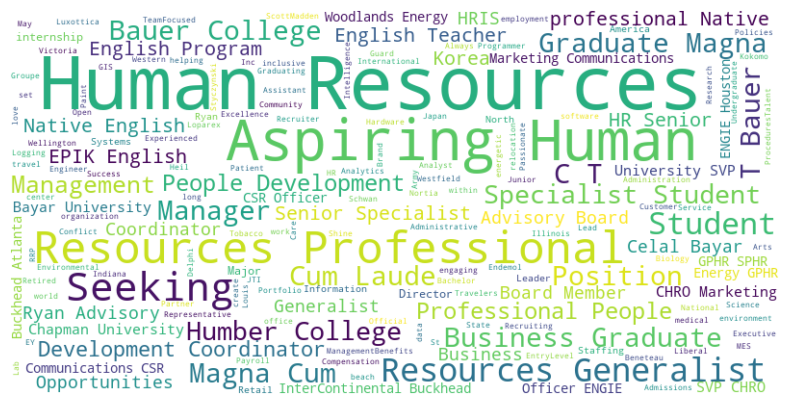

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all job titles into one text string
all_text = " ".join(df["job_title"])
words = all_text.split()
words = [clean_word(word) for word in words]

# Join cleaned words into a single string for word cloud generation
cleaned_text = " ".join(words)

# Create and configure the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()



In [49]:
from collections import Counter
import pandas as pd
import re


# Combine all job titles into one text string
all_text = " ".join(df["job_title"])

# Tokenize (split into words)
words = all_text.split()

#words = [clean_word(word) for word in words]
words = [clean_word(word) for word in words if clean_word(word).strip()]
# Get word frequencies
word_counts = Counter(words)

# Convert to DataFrame
df_word_counts = pd.DataFrame(word_counts.items(), columns=["Word", "Count"])

# Sort by highest frequency
df_word_counts = df_word_counts.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display result
print(df_word_counts)



                   Word  Count
0             Resources     63
1                 Human     63
2                    at     46
3                   and     28
4              Aspiring     27
5               College     14
6               Student     14
7            Generalist     14
8            Specialist     12
9            University     12
10         Professional     12
11             Business     11
12                   in     10
13              English     10
14                   of     10
15          Coordinator     10
16              Seeking     10
17             aspiring      8
18         professional      8
19                 2019      7
20                  Cum      7
21                Bauer      7
22             Graduate      7
23                Magna      7
24                Laude      7
25                 C.T.      7
26               Humber      7
27                    &      7
28               Senior      6
29           Management      6
30                   HR      6
31      

In [56]:
import re

def clean_location(location):
    # Dictionary to standardize country names
    replacements = {
        "Kanada": "Canada",
        "Amerika Birleşik Devletleri": "United States",
        "İzmir, Türkiye": "Izmir, Turkey"
    }
    location = replacements.get(location, location)

    # Replace '/' with ',' for consistency
    location = location.replace("/", ", ")

    # Remove 'Area' (e.g., "Houston, Texas Area" → "Houston, Texas")
    location = re.sub(r"\s*Area$", "", location)

    # Convert "Greater [City] Area" → "City, State" or "City, Country"
    location = re.sub(r"^Greater\s+", "", location)

    # Dictionary for adding missing state or country
    city_to_state = {
        "Los Angeles": "Los Angeles, California",
        "New York": "New York, New York",
        "San Francisco": "San Francisco, California",
        "Houston": "Houston, Texas",
        "Chicago": "Chicago, Illinois",
        "Austin": "Austin, Texas",
        "Dallas": "Dallas, Texas",
        "Toronto": "Toronto, Canada",
        "London": "London, United Kingdom",
        "Paris": "Paris, France",
        "Berlin": "Berlin, Germany",
    }

    # If location matches a city without a state/country, add the full name
    if location in city_to_state:
        location = city_to_state[location]

    return location


In [57]:
# Apply cleaning function to the location column
df["location"] = df["location"].apply(clean_location)

# Get unique location values
unique_locations = df["location"].unique()

# Sort and print unique locations
for location in sorted(unique_locations):
    print(location)

Atlanta
Atlanta, Georgia
Austin, Texas
Baltimore, Maryland
Baton Rouge, Louisiana
Boston
Bridgewater, Massachusetts
Canada
Cape Girardeau, Missouri
Chattanooga, Tennessee
Chicago, Illinois
Dallas, Fort Worth
Denton, Texas
Gaithersburg, Maryland
Grand Rapids, Michigan
Highland, California
Houston, Texas
Izmir, Turkey
Jackson, Mississippi
Katy, Texas
Kokomo, Indiana
Lafayette, Indiana
Lake Forest, California
Las Vegas, Nevada
Long Beach, California
Los Angeles, California
Milpitas, California
Monroe, Louisiana
Myrtle Beach, South Carolina
New York City
New York, New York
Philadelphia
Raleigh-Durham, North Carolina
San Francisco Bay
San Jose, California
Torrance, California
United States
Virginia Beach, Virginia
